# Tarea de clusters 

## Descripcción
En este proyecto cada grupo ejecutara y evaluara distintos algoritmos de clustering sobre un set de datos dado. Para la evaluacion considere la calidad de los clusters en terminos de distancias intra-clusters e inter-clusters considerando parametros que requiera el algoritmo. Ademas evalue el tiempo de ejecucion de los clusters. Para su estudio considere los siguientes algoritmos de clustering.

* kmeans
* Minibatch kmeans
* Jerarquico aglomerativo ´
* DBSCAN o HDBSCAN
* Meanshift

## Datos
Para su evaluacion considere el conjunto de puntos 3D entregados ante riormente en el curso (test21 pts 1.txt).

## Evaluacion de clusters 

Para evaluar los algoritmos de clustering considere la distancia maxima entre cualquier par de puntos para cada cluster y dibuje el CDF con numero de clusters con distancia maximas. Para la distancia inter-cluster compute las distancias mınima entre distintos clusters y construya el CDF con estas distancias para todos los clusters. Para esta medida considere los centroides de los clusters. Ademas proporcione graficos que muestren una comparacion en tiempo de ejecucion para cada algoritmo dependiendo de sus parametros y la comparacion entre distintos algoritmos. Para esto ultimo considere que fija de alguna manera lo que cree es una buena solucion al problema. 




# Introducción

Un cluster es una herramienta utilizada para agrupar elementos por su similitud o cercanía dimensional. El objetivo de utilizar estas herramientas es máximizar la similitud de los objetos por cada cluster y maximizar la no similitud entre los objetos de los distintos clusters. Este tipo de tecnicas es muy utilizada en el área del machine learning como un método de ajuste y predicción de datos, sin embargo, cuando se debe hacer un análisis de grandes volumenes de datos, este tipo de herramientas se vuelven fundamentales, ya que nos permiten agrupar los datos por sus caracteristicas y hacer una simplificación de estos. Sin embargo al manejar muchos datos se requiere una buena capacidad de computo, lo cual puede ser una limitante para su utilización. 

En este trabajo se plantea la evaluación de cinco cluster diferentes:
* kmeans
* Minibatch kmeans
* Jerarquico aglomerativo ´
* DBSCAN 
* Meanshift

Cada uno de estos cluster se evaluarán con diferentes parametros y se obtendrá la distancia máxima entre puntos dentro del cluster, la distancia mínima entre clusters y el tiempo de computo del cluster. Esto fue realizado con el lenguaje *Python 3.5*, compilado con el motor del *Anaconda 5.3.1* y ejecutado en un computador *Dell Optiplex 9030, Intel i7-4790S 3.20 Ghz, 8GB RAM*. 

# Librerias

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.cluster
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
import scipy
from scipy.spatial import distance
import time

# Lectura de Datos

In [27]:
archivo=pd.read_csv('test21_pts_1.txt', header=None, delim_whitespace=True)
tamaño_archivo=len(archivo)

In [28]:
data=[]
for i in range (tamaño_archivo):
    data.append(archivo.iloc[i])    

In [29]:
data = np.asarray(data)
data=data.reshape(tamaño_archivo,3)

In [30]:
print(data)
print(len(data))

[[119.279  70.17   20.23 ]
 [115.553  73.036  17.536]
 [116.126  73.648  17.471]
 ...
 [112.595 105.922  78.315]
 [109.662 157.261 102.544]
 [110.766 140.324 116.952]]
258382


NameError: name 'n_clusters_' is not defined

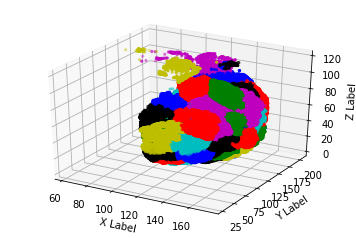

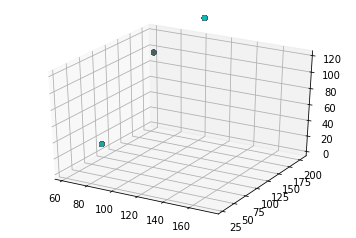

In [9]:
X=data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
figc = plt.figure(2)
axc = figc.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

labels1=lebels_cluster_kmeans

 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_kmeans), colors):
    my_members = labels1 == k
    cluster_center = cluster_centers_kmeans[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], X[my_members, 2], c=col, marker='.')
    axc.scatter(cluster_centers_kmeans[0], cluster_centers_kmeans[1], cluster_centers_kmeans[2], c=col, marker='o')
axc.set_xlim(ax.get_xlim())
axc.set_ylim(ax.get_ylim())
axc.set_zlim(ax.get_zlim())    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Datos de prueba

In [74]:
data=data[0:20000]

# Obtencion de cluster

In [100]:
def clusterizacion(data,parametros_cluster,tipo_cluster):
    if tipo_cluster=="kmeans":
        start=time.time()
        cl= sklearn.cluster.KMeans(n_clusters=parametros_cluster)
        clusters=cl.fit(data)
        end=time.time()
        fin=end-start
        lebels=clusters.labels_
        n_clusters = lebels.max()+1
        cluster_centers= clusters.cluster_centers_
    
    if tipo_cluster=="minibatchkmeans":  
        start=time.time()
        cl = sklearn.cluster.MiniBatchKMeans(n_clusters=parametros_cluster)
        clusters=cl.fit(data)
        end=time.time()
        fin=end-start
        lebels=clusters.labels_
        n_clusters = lebels.max()+1
        cluster_centers= clusters.cluster_centers_
        
        
    if tipo_cluster=="aglomerativo":
        start=time.time()
        cl = sklearn.cluster.AgglomerativeClustering(parametros_cluster)
        clusters=cl.fit(data)
        end=time.time()
        fin=end-start
        lebels=clusters.labels_
        n_clusters = lebels.max()+1
        
        #Diccionario de puntos por cluster
        puntos_cluster={}
        for a in range(n_clusters):
            puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels[i]==a )           
        
        #Genero los centroides
        centro_cluster={}
        for j in range(n_clusters):
            x=[]
            y=[]
            z=[]
            for i in range(len(puntos_cluster[j])):
                x.append(puntos_cluster[j][i][0])
                y.append(puntos_cluster[j][i][1])
                z.append(puntos_cluster[j][i][2])
            centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])] 

        cluster_centers=list(centro_cluster.values())        
        
        
    if tipo_cluster=="dbscan":
        epsilon=parametros_cluster[0]
        min_puntos=parametros_cluster[1]
        start=time.time()
        cl=sklearn.cluster.DBSCAN(eps=epsilon, min_samples=min_puntos)
        clusters=cl.fit(data)
        end=time.time()
        fin=end-start
        lebels=clusters.labels_
        n_clusters = lebels.max()+1 

        #Diccionario de puntos por cluster
        puntos_cluster={}
        for a in range(n_clusters):
            puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels[i]==a )    
            
        #Genero los centroides
        centro_cluster={}
        for j in range(n_clusters):
            x=[]
            y=[]
            z=[]
            for i in range(len(puntos_cluster[j])):
                x.append(puntos_cluster[j][i][0])
                y.append(puntos_cluster[j][i][1])
                z.append(puntos_cluster[j][i][2])
            centro_cluster[j]=[sum(x)/len(puntos_cluster[j]),sum(y)/len(puntos_cluster[j]),sum(z)/len(puntos_cluster[j])] 

        cluster_centers=list(centro_cluster.values())            

    if tipo_cluster=="meanshift":
        start=time.time()
        cl=MeanShift(bandwidth=parametros_cluster, bin_seeding=True)
        clusters=cl.fit(data)
        end=time.time()
        fin=end-start
        lebels=clusters.labels_
        n_clusters = lebels.max()+1
        cluster_centers= clusters.cluster_centers_
        
    return(lebels,n_clusters,cluster_centers,fin)        

## Distancia entre puntos

In [58]:
def distancia_intra_cluster(data,lebels,n_clusters,cluster_centers):
    #Diccionario de puntos por cluster
    puntos_cluster={}
    for a in range(n_clusters):
        puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels[i]==a )    

    #distancias intra-cluster
    distancia_max_por_cluster=[]
    for i in range(n_clusters):
        dist=scipy.spatial.distance.cdist(puntos_cluster[i],puntos_cluster[i])
        distancia_max_por_cluster.append(np.amax(dist))
    
    #Guardo la distancia maxima entre los puntos   
    distancia_max_puntos=max(distancia_max_por_cluster)
    
    return(distancia_max_puntos)
        


## Distancia entre clusters

In [50]:
def distancia_inter_cluster(cluster_centers):
    print("hola")
    #Saco la distancia entre los centroides de los clusters
    dist_centroides=scipy.spatial.distance.cdist(cluster_centers,cluster_centers)
    distancia_minima_cluster = np.min(dist_centroides[np.nonzero(dist_centroides)])
    return(distancia_minima_cluster)
    

## Tiempo de computo 

In [53]:
def tiempo_computo(fin):
    Tiempos_creacion=fin
    return(Tiempos_creacion)

# Main

In [99]:
""" 
En el parametro tipo_cluster que se encuentra en la función clusterización de puede determinar el método por el cual se quiere
resolver el problema. los metodos aceptados son:
-kmeans
-minibatchkmeans
-aglomerativo
-dbscan
-meanshift

La variable parametros_iteraciones debe contener los parametros del cluster, por ejemplo si es un kmeans debe contener una
lista de eneteros, los cuales representan el numero de cluster en cada iteracion. En caso del DBSCAN debe contener una lista
de tuplas, la cual estara compuesta del epsilon y el min sample. Finalmente para el Meanshift se debe tener una lista de 
entero que represente los bandwith de cada iteración. 
"""

parametros_iteraciones=[10, 30, 50,70 ,100, 150, 200, 300]
distancia_max_puntos_iteraciones=[]
distancia_minima_cluster_iteraciones=[]
tiempo_computo_iteraciones=[]
for parametros in parametros_iteraciones:
    #Genero el cluster
    lebels,n_clusters,cluster_centers,fin=clusterizacion(data,parametros_cluster=parametros,tipo_cluster='kmeans')
    
    #Genero los parametros
    distancia_max_puntos=distancia_intra_cluster(data,lebels,n_clusters,cluster_centers)
    distancia_minima_cluster=distancia_inter_cluster(cluster_centers)
    tiempo_computo_cluster=tiempo_computo(fin)
    
    #Guardo los datos generados de cada iteracion
    distancia_max_puntos_iteraciones.append(distancia_max_puntos)
    distancia_minima_cluster_iteraciones.append(distancia_minima_cluster)
    tiempo_computo_iteraciones.append(tiempo_computo_cluster)
    
print("distancia_max_puntos_iteraciones= ",distancia_max_puntos_iteraciones) 
print("distancia_minima_cluster_iteraciones= ",distancia_minima_cluster_iteraciones)
print("tiempo_computo_iteraciones= ",tiempo_computo_iteraciones)

hola
hola
hola
hola
hola
hola
hola
hola
distancia_max_puntos_iteraciones=  [73.80841189187042, 55.17478213821963, 44.44838163533067, 39.32396198248594, 36.06314065635438, 28.137220225175046, 25.17711826242234, 19.65510724977097]
distancia_minima_cluster_iteraciones=  [25.774629057811698, 16.84717608118975, 11.443188873101908, 9.428141034627528, 7.093894312002557, 5.598197758708789, 4.5298701727402975, 2.7923210101750637]
tiempo_computo_iteraciones=  [0.7694058418273926, 2.682006597518921, 3.7050087451934814, 5.498011827468872, 7.404016733169556, 10.889422416687012, 14.629428625106812, 18.583037853240967]
